Separating line values:
	 m=-0.9999906699740528
	b=-1.538485347366116

weights: [0.62399171 0.62399754]
offset: -0.960011065492847
margin: 0.32633506552352104



(0.0, 2.5, 0.0, 2.5)

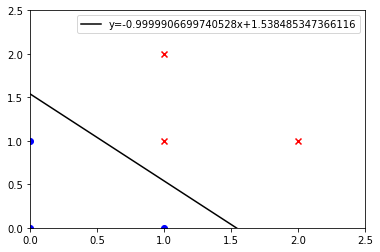

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

x = np.array([[1,1], [1,2], [2,1], [0,0], [1,0], [0,1]])
y = np.array([1,1,1,-1,-1,-1])

#find optimal separating line for q1
model = svm.LinearSVC(fit_intercept=True, random_state=55)
model = model.fit(x, y)

weights, offset = model.coef_[0], model.intercept_[0]

b = offset / weights[1]
w = weights / weights[1]

print(f'Separating line values:\n\t m={-w[0]}\n\tb={b}\n')

#calculate margin
margin = (np.dot(weights, x[0]) + offset) / np.linalg.norm(weights)
print(f'weights: {weights}\noffset: {offset}\nmargin: {margin}\n')

#graphing points and separating line
sep_x = np.linspace(0, 2, 2)
sep_y = -w[0] * sep_x - b

plt.scatter(x[0:3,0], x[0:3,1], marker='x', color='r')
plt.scatter(x[3:,0], x[3:,1], marker='o', color='b')
plt.plot(sep_x, sep_y, color='k', label=f'y=-{w[0]}x+{-b}')
plt.legend(loc='best')
plt.axis([0, 2.5, 0, 2.5])

In [ ]:

#q2 part 1 calculations

SVs = np.array([[1,0], [0,1], [1,1]])
sv_classes = np.array([[-1,-1,1]])
num_svs = SVs.shape[0]

print(f'Support vectors: {SVs}\nClasses: {sv_classes}')

#calc kernel
kernel = np.zeros((num_svs, num_svs))
for v1 in range(num_svs):
  for v2 in range(num_svs):
    kernel[v1,v2] = np.dot(SVs[v1], SVs[v2])

#solving using a linear system of 4 equations, 4 unknowns (3 lambdas and a 'b'). 
system = kernel * sv_classes
system = np.concatenate((system, np.ones((system.shape[0],1))), axis=1)
classes_addon = np.concatenate((sv_classes, [[0]]), axis=1)
system = np.concatenate((system, classes_addon), axis=0)

#represents (lamba_0, lambda_1, ..., lambda_i, b) where i is the number of support vectors
sol = np.dot(np.linalg.inv(system), classes_addon.transpose())
lambdas, b = sol[0:-1,0], sol[-1,0]
print(f'Lambas: {lambdas}\nb: {b}\n')

#classify new point(s) q2 part 2
point = np.array([0,2])
sum = B
for i in range(num_svs):
  sum += lambdas[i] * sv_classes[0,i] * np.dot(SVs[i], point)

print(f'Point {point} classified as {sum}')

Support vectors: [[1 0]
 [0 1]
 [1 1]]
Classes: [[-1 -1  1]]
Lambas: [2. 2. 4.]
b: -3.0

Point [0 2] classified as 1.0
